In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("data/stackoverflow_full.csv")

In [3]:
data

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [4]:
data = data.drop(columns=['Unnamed: 0'])


In [5]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

data.fillna(data.mean(), inplace=True)


Missing Values:
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


C:\Users\Rj\AppData\Local\Temp\ipykernel_5732\1265254351.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [6]:
data_encoded = pd.get_dummies(data, columns=['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country'])


In [7]:
data['HaveWorkedWith'].fillna("", inplace=True)
data['TotalLanguagesWorkedWith'] = data['HaveWorkedWith'].apply(lambda x: len(x.split(';')) if x != "" else 0)


In [8]:
from scipy import stats

z_scores = stats.zscore(data[['YearsCode', 'YearsCodePro', 'PreviousSalary']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [9]:
data.drop_duplicates(inplace=True)


In [10]:
data

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,TotalLanguagesWorkedWith
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,4
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,12
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,7
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,13
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,13
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,11
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,12
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,15


In [11]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71798 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       71798 non-null  object 
 1   Accessibility             71798 non-null  object 
 2   EdLevel                   71798 non-null  object 
 3   Employment                71798 non-null  int64  
 4   Gender                    71798 non-null  object 
 5   MentalHealth              71798 non-null  object 
 6   MainBranch                71798 non-null  object 
 7   YearsCode                 71798 non-null  int64  
 8   YearsCodePro              71798 non-null  int64  
 9   Country                   71798 non-null  object 
 10  PreviousSalary            71798 non-null  float64
 11  HaveWorkedWith            71798 non-null  object 
 12  ComputerSkills            71798 non-null  int64  
 13  Employed                  71798 non-null

In [12]:
data.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,TotalLanguagesWorkedWith
count,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000
mean,0.885442,13.648890,8.533803,66403.791888,13.477994,0.538344,13.477994
std,0.318489,8.604917,6.968214,48405.462309,7.039559,0.498531,7.039559
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28308.000000,8.000000,0.000000,8.000000
50%,1.000000,11.000000,6.000000,56498.000000,13.000000,1.000000,13.000000
75%,1.000000,19.000000,12.000000,93701.000000,17.000000,1.000000,17.000000
max,1.000000,42.000000,32.000000,216200.000000,107.000000,1.000000,107.000000


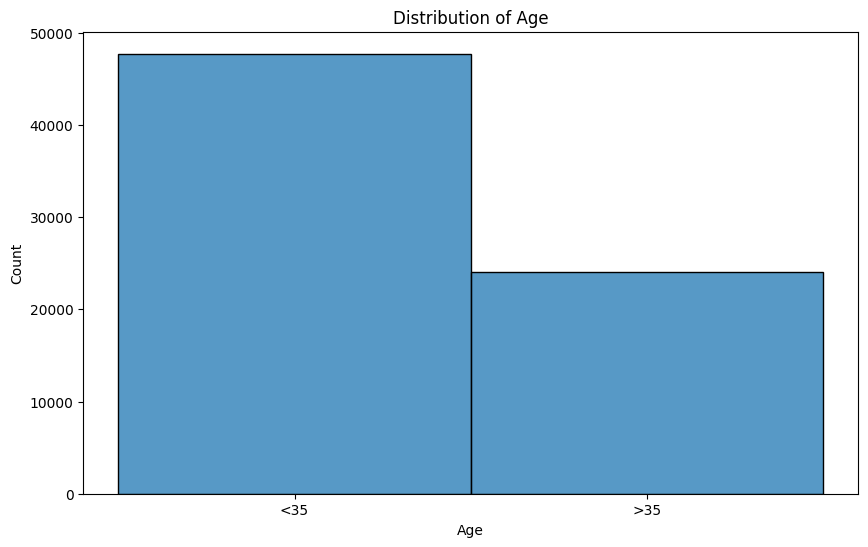

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

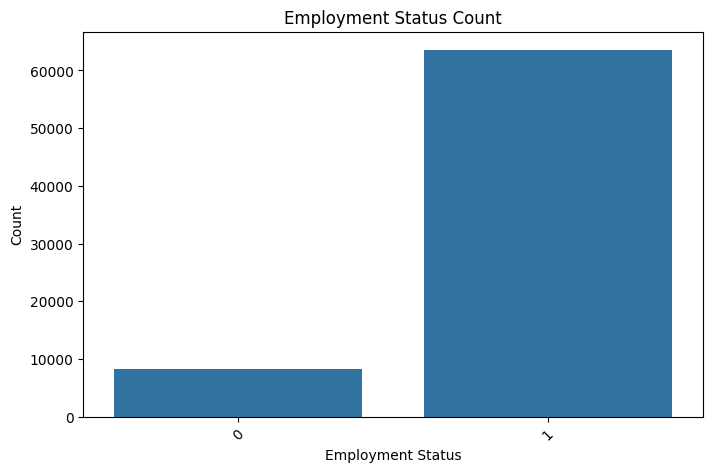

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Employment')
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Rj\AppData\Local\Temp\ipykernel_5732\571606977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


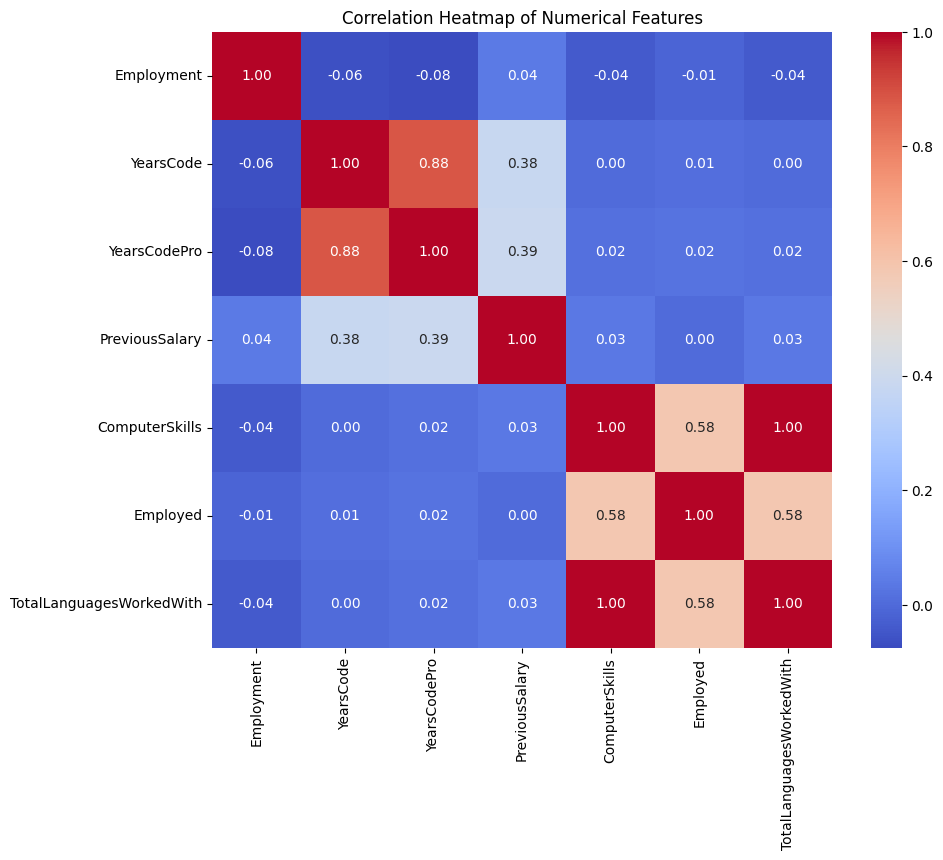

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71798 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       71798 non-null  object 
 1   Accessibility             71798 non-null  object 
 2   EdLevel                   71798 non-null  object 
 3   Employment                71798 non-null  int64  
 4   Gender                    71798 non-null  object 
 5   MentalHealth              71798 non-null  object 
 6   MainBranch                71798 non-null  object 
 7   YearsCode                 71798 non-null  int64  
 8   YearsCodePro              71798 non-null  int64  
 9   Country                   71798 non-null  object 
 10  PreviousSalary            71798 non-null  float64
 11  HaveWorkedWith            71798 non-null  object 
 12  ComputerSkills            71798 non-null  int64  
 13  Employed                  71798 non-null  int64  
 14  TotalL

In [17]:
final_df = data.drop(columns=["Accessibility",'MentalHealth',"Country","ComputerSkills",'HaveWorkedWith','Gender'])

In [18]:
final_df.to_csv("data.csv")

In [19]:
final_df

,Age,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,Employed,TotalLanguagesWorkedWith
0,<35,Master,1,Dev,7,4,51552.0,0,4
1,<35,Undergraduate,1,Dev,12,5,46482.0,1,12
2,<35,Master,1,Dev,15,6,77290.0,0,7
3,<35,Undergraduate,1,Dev,9,6,46135.0,0,13
4,>35,PhD,0,NotDev,40,30,160932.0,0,2
...,...,...,...,...,...,...,...,...,...
73457,<35,Undergraduate,1,Dev,7,2,41058.0,1,13
73458,>35,Undergraduate,1,Dev,21,16,115000.0,1,11
73459,<35,Undergraduate,1,Dev,4,3,57720.0,1,12
73460,<35,Undergraduate,1,Dev,5,1,70000.0,1,15


In [20]:
final_df.isnull().sum()

Age                         0
EdLevel                     0
Employment                  0
MainBranch                  0
YearsCode                   0
YearsCodePro                0
PreviousSalary              0
Employed                    0
TotalLanguagesWorkedWith    0
dtype: int64

In [21]:
features = final_df.columns
features

Index(['Age', 'EdLevel', 'Employment', 'MainBranch', 'YearsCode',
       'YearsCodePro', 'PreviousSalary', 'Employed',
       'TotalLanguagesWorkedWith'],
      dtype='object')

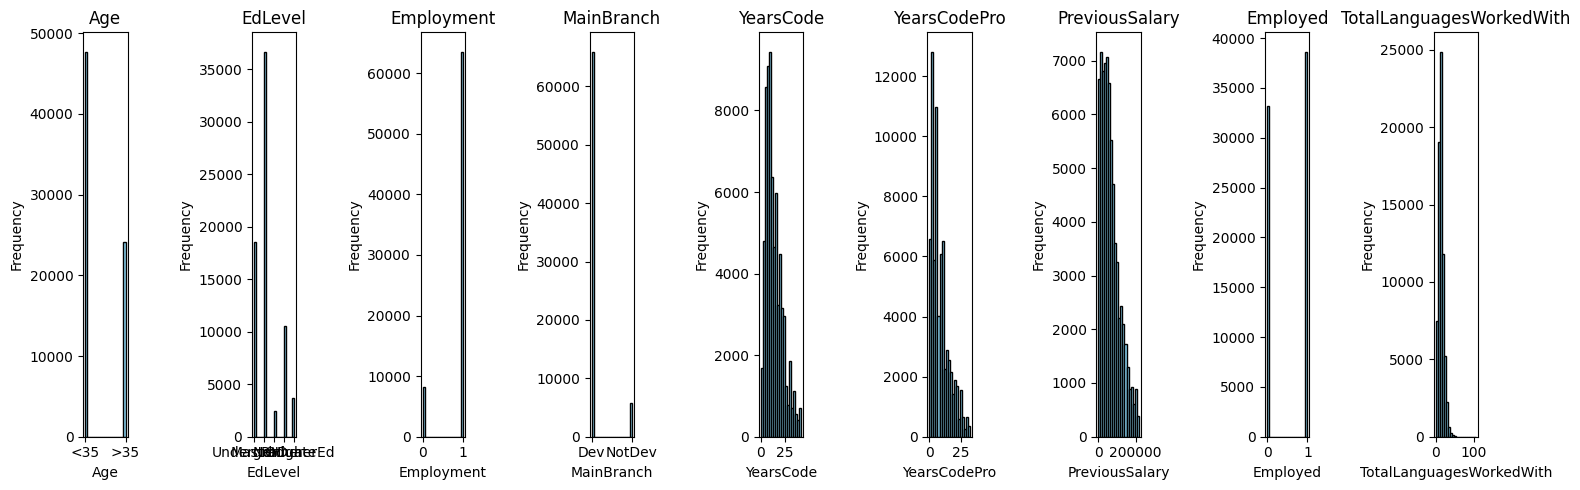

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


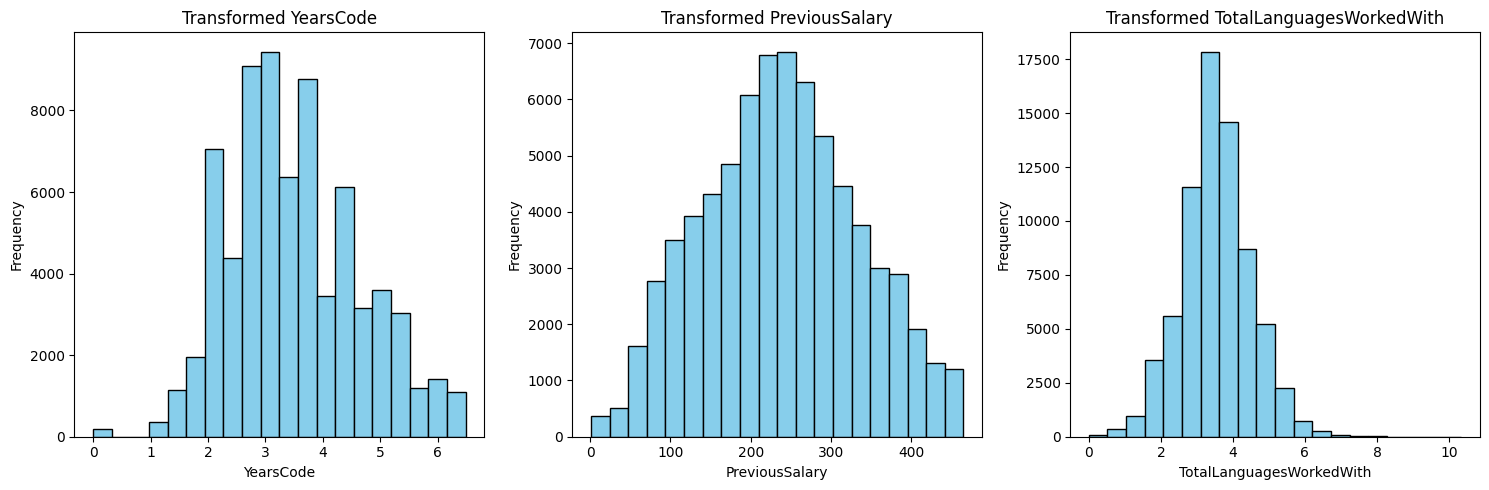

In [23]:
import numpy as np

skewed_features = ['YearsCode', 'PreviousSalary','TotalLanguagesWorkedWith']

for feature in skewed_features:
    data[feature] = np.sqrt(data[feature])

plt.figure(figsize=(15, 5))

for i, feature in enumerate(skewed_features, 1):
    plt.subplot(1, len(skewed_features), i)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Transformed {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['EdLevel','Age','MainBranch'])
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(final_df)

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

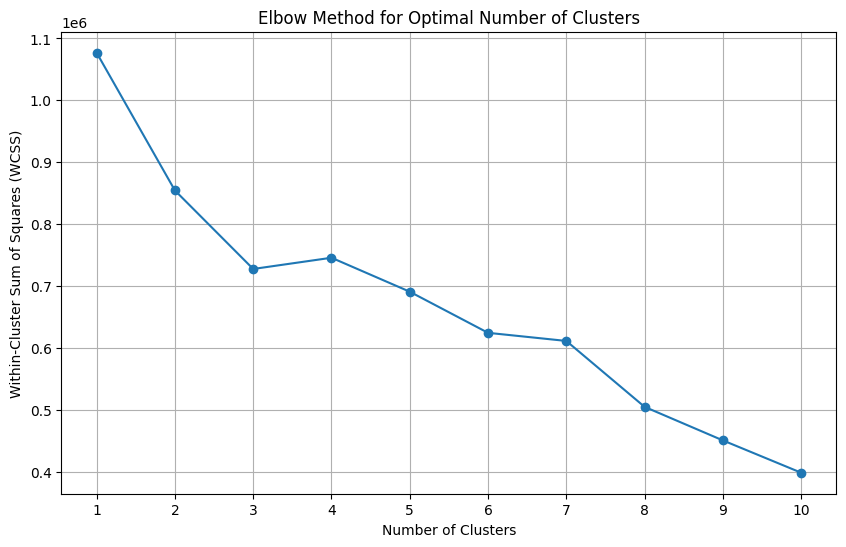

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


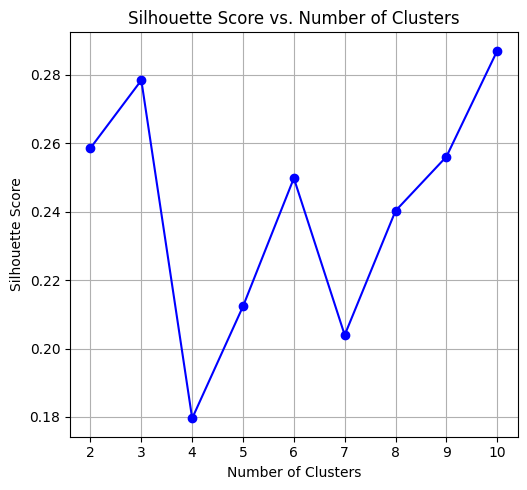

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Define the range of clusters to test
k_range = range(2, 11)

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))
   


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)


plt.tight_layout()
plt.show()


In [32]:
n_clusters = 3

In [33]:
kmeans_model = KMeans(n_clusters=n_clusters,init='k-means++' ,random_state=42)
kmeans_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [34]:
final_df['Cluster'] = kmeans_model.labels_


In [35]:
cluster_centers = kmeans_model.cluster_centers_
feature_names = final_df.columns
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1} Characteristics:")
    for feature, value in zip(feature_names, center):
        print(f"   {feature}: {value}")

Cluster 1 Characteristics:
   Age: 0.10583223032954364
   EdLevel: -0.04186390058553244
   Employment: 0.06937357677660828
   MainBranch: 0.08729222684096075
   YearsCode: -0.1551901392324754
   YearsCodePro: -1.4058262117945188
   PreviousSalary: 1.4058262117945188
   Employed: 0.29802990717591193
   TotalLanguagesWorkedWith: -0.29802990717591193
   Cluster: -0.09576700001116556
Cluster 2 Characteristics:
   Age: -0.06410793908339121
   EdLevel: 0.021930007449461414
   Employment: -0.03136822310364881
   MainBranch: -0.11555741086524259
   YearsCode: 0.11088945091466033
   YearsCodePro: 0.6985613799036025
   PreviousSalary: -0.6985613799036025
   Employed: 0.2980299071759365
   TotalLanguagesWorkedWith: -0.2980299071759365
   Cluster: 0.048620881310887536
Cluster 3 Characteristics:
   Age: 0.10968989881024811
   EdLevel: -0.01713405006431483
   Employment: -0.009680086869798838
   MainBranch: 0.5704043234509999
   YearsCode: -0.29011649796992306
   YearsCodePro: -0.2854327651270635
  

In [36]:
final_df

,Age,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,Employed,TotalLanguagesWorkedWith,Cluster
0,<35,Master,1,Dev,7,4,51552.0,0,4,1
1,<35,Undergraduate,1,Dev,12,5,46482.0,1,12,1
2,<35,Master,1,Dev,15,6,77290.0,0,7,1
3,<35,Undergraduate,1,Dev,9,6,46135.0,0,13,1
4,>35,PhD,0,NotDev,40,30,160932.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
73457,<35,Undergraduate,1,Dev,7,2,41058.0,1,13,1
73458,>35,Undergraduate,1,Dev,21,16,115000.0,1,11,0
73459,<35,Undergraduate,1,Dev,4,3,57720.0,1,12,1
73460,<35,Undergraduate,1,Dev,5,1,70000.0,1,15,1


### Highly Desirable Candidates Cluster: 
This cluster represents candidates who are likely highly desirable and hirable. They have significant professional coding experience (YearsCodePro), high previous salaries, and are employed. Employers may find them valuable due to their extensive experience and skills.

### Promising Candidates Cluster: 
Candidates in this cluster show promise and potential for employment. They have some coding experience but may be in the earlier stages of their careers, reflected in their lower previous salaries and fewer years of professional coding experience compared to Cluster 1. However, they are still employed and have the opportunity to grow and develop their skills further.

### Skillful but Unemployed Candidates Cluster: 
This cluster consists of candidates who possess diverse skill sets (TotalLanguagesWorkedWith) but are currently unemployed. Despite their skills and experience, they may face challenges in finding employment opportunities. Employers may consider exploring this pool of talent for potential hires.

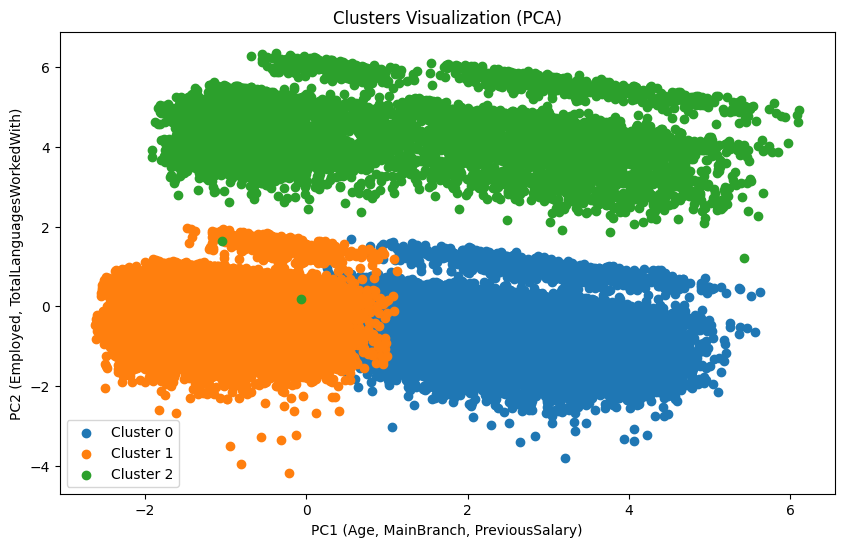

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    plt.scatter(X_pca[final_df['Cluster'] == cluster, 0], X_pca[final_df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('Clusters Visualization (PCA)')
plt.xlabel('PC1 (Age, MainBranch, PreviousSalary)')
plt.ylabel('PC2 (Employed, TotalLanguagesWorkedWith)')
plt.legend()
plt.show()


In [38]:
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]
for feature, loading_pc1, loading_pc2 in zip(features, pc1_loadings, pc2_loadings):
    print(f"Feature: {feature}, PC1 Loading: {loading_pc1}, PC2 Loading: {loading_pc2}")

Feature: Age, PC1 Loading: 0.0829555029069034, PC2 Loading: 0.10218872649309801
Feature: EdLevel, PC1 Loading: -0.022823871218586766, PC2 Loading: 0.006687300074863265
Feature: Employment, PC1 Loading: 0.03811638252002123, PC2 Loading: -0.013941213098670701
Feature: MainBranch, PC1 Loading: 0.10395030150041379, PC2 Loading: 0.20532633153010077
Feature: YearsCode, PC1 Loading: -0.127518112086618, PC2 Loading: -0.15755040083813474
Feature: YearsCodePro, PC1 Loading: -0.4771482791762757, PC2 Loading: 0.05136589886584262
Feature: PreviousSalary, PC1 Loading: 0.4771482791762757, PC2 Loading: -0.051365898865842634
Feature: Employed, PC1 Loading: -0.09213605652447716, PC2 Loading: -0.6028982249105708
Feature: TotalLanguagesWorkedWith, PC1 Loading: 0.09213605652447715, PC2 Loading: 0.6028982249105708


In [39]:
def decode_cluster_labels(labels):
    decoded_labels = []
    for label in labels:
        if label == 0:
            decoded_labels.append("Highly Desirable Candidates Cluster")
        elif label == 1:
            decoded_labels.append("Promising Candidates Cluster")
        elif label == 2:
            decoded_labels.append("Skillful but Unemployed Candidates Cluster")
        else:
            decoded_labels.append("Unknown Cluster")
    return decoded_labels

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Sample new data
new_data_point_cluster2 = {
    'Age': [-0.06410793908339121, 0.10583223032954367, 0.10968989881024814],
    'EdLevel': [0.02193000744946141, -0.041863900585532444, -0.01713405006431483],
    'Employment': [-0.03136822310364881, 0.06937357677660827, -0.009680086869798838],
    'MainBranch': [-0.11555741086524257, 0.08729222684096075, 0.5704043234509999],
    'YearsCode': [0.11088945091466033, -0.15519013923247543, -0.2901164979699231],
    'YearsCodePro': [0.6985613799036026, -1.4058262117945188, -0.2854327651270635],
    'PreviousSalary': [-0.6985613799036026, 1.4058262117945188, 0.2854327651270635],
    'Employed': [0.2980299071759366, 0.29802990717591193, -3.3553679544285435],
    'TotalLanguagesWorkedWith': [-0.2980299071759366, -0.29802990717591193, 3.3553679544285435]
}



new_data = pd.DataFrame(new_data_point_cluster2)

new_data.shape

(3, 9)

In [43]:
data_encoded = preprocessor.fit_transform(new_data)

In [44]:
data_encoded.shape

(3, 15)

In [45]:

new_data_cluster_labels = kmeans_model.predict(data_encoded)

new_data_decoded_labels = decode_cluster_labels(new_data_cluster_labels)
new_data['Cluster_Label'] = new_data_decoded_labels


In [46]:
new_data

,Age,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,Employed,TotalLanguagesWorkedWith,Cluster_Label
0,-0.064108,0.021930,-0.031368,-0.115557,0.110889,0.698561,-0.698561,0.298030,-0.298030,Highly Desirable Candidates Cluster
1,0.105832,-0.041864,0.069374,0.087292,-0.155190,-1.405826,1.405826,0.298030,-0.298030,Promising Candidates Cluster
2,0.109690,-0.017134,-0.009680,0.570404,-0.290116,-0.285433,0.285433,-3.355368,3.355368,Promising Candidates Cluster
